#CLASIFICACION DE IMAGENES TIPOS DE MELANOMAS
### JHON URIBE
### JOSE PUMAREJO

In [40]:
#@title Cargar librerias { display-mode: "form" }
#@markdown Se recomienda correr el entorno de ejecución en GPU
from glob import glob
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.11.0


In [41]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/')
print(os.getcwd())

Mounted at /content/drive
/content


In [42]:
from google.colab import files

!pip install -q kaggle
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [43]:
!kaggle datasets download --force -d andrewmvd/isic-2019

100% 9.09G/9.10G [01:26<00:00, 179MB/s]
100% 9.10G/9.10G [01:26<00:00, 112MB/s]


In [44]:
!unzip isic-2019

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065358.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065371.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065372.jpg  
  inflating: ISIC_2019_Training_Input

In [45]:
from imutils import paths
imagenesC = list(paths.list_images('/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input'))
len(imagenesC)

25331

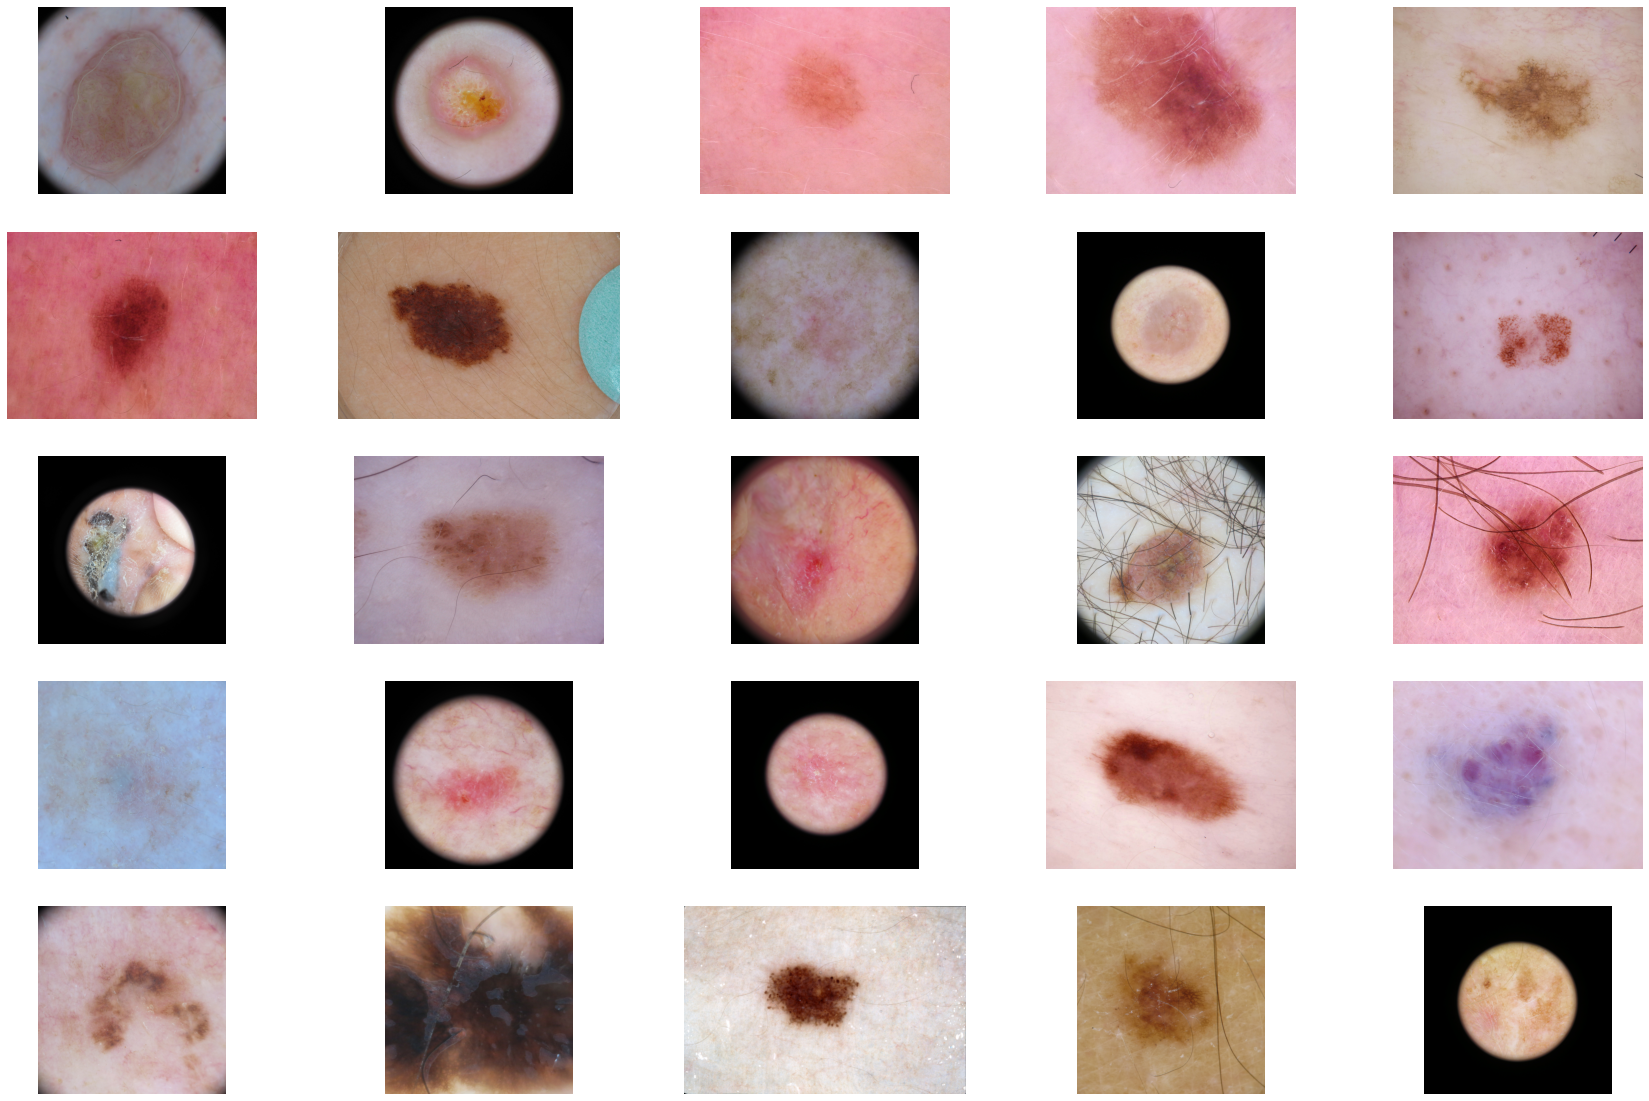

In [46]:
import random
the_array = random.sample(imagenesC , 25)
the_array
plt.figure(figsize=(30,20))

for i in range(25):
    plt.subplot(5,5,i+1)    # 25x25 imagenes aleatorias
    plt.imshow(np.asarray(plt.imread(the_array[i])))
    plt.axis('off') 
plt.show()

In [47]:
path_ground_truth_data = '/content/ISIC_2019_Training_GroundTruth.csv'
ground_truth_labels = pd.read_csv(path_ground_truth_data)
CLASSES = ground_truth_labels.columns[1:-1].values
print(CLASSES)

['MEL' 'NV' 'BCC' 'AK' 'BKL' 'DF' 'VASC' 'SCC']


In [48]:
data = pd.read_csv("/content/ISIC_2019_Training_GroundTruth.csv")
data.sample(5)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
21376,ISIC_0067026,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12914,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16582,ISIC_0059357,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22811,ISIC_0069255,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18979,ISIC_0063176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data.rename(columns = {'image':'image2'}, inplace = True)
all_data = pd.concat([data], axis=1).drop_duplicates()
all_data

,image2,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
all_data.image2 = '/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/'+data.image2+'.jpg'
all_data['categoria'] = all_data[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']].idxmax(1)
all_data['id_categoria'] = all_data['categoria'].replace(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'], [0,1,2,3,4,5,6,7])
all_data

,image2,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,categoria,id_categoria
0,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,1
1,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,1
2,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,0
3,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,1
4,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25326,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC,2
25327,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BKL,4
25328,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,0
25329,/content/ISIC_2019_Training_Input/ISIC_2019_Tr...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,1


In [51]:
p_train = 0.90 # Porcentaje de train.

all_data['is_train'] = np.random.uniform(0, 1, len(all_data)) <= p_train
train, test = all_data[all_data['is_train']==True], all_data[all_data['is_train']==False]

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  22743
Ejemplos usados para test:  2588


In [60]:
train_imgs = []
for i in train.image2:
  try:
    im = tf.keras.preprocessing.image.load_img(i, target_size=(32, 32))
    train_imgs.append(tf.keras.preprocessing.image.img_to_array(im));
  except AttributeError:
    print('rading an image')
test_imgs = []
for i in test.image2:
  try:
    im = tf.keras.preprocessing.image.load_img(i, target_size=(32, 32))
    test_imgs.append(tf.keras.preprocessing.image.img_to_array(im));
  except AttributeError:
    print('rading an image')
 
x_train = np.array(train_imgs)
x_test = np.array(test_imgs)
x_train /= 255
x_test /= 255
len(train_imgs), len(test_imgs), x_train.shape, x_test.shape

(22743, 2588, (22743, 32, 32, 3), (2588, 32, 32, 3))

In [61]:
labels_train = train.id_categoria.values
labels_test = test.id_categoria.values

y_test = tf.keras.utils.to_categorical(labels_test)
y_train = tf.keras.utils.to_categorical(labels_train) 

labels_train.shape, labels_train, labels_test.shape
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (22743, 32, 32, 3)
Number of images in x_train 22743 y_train: (22743, 8)
Number of images in x_test 2588 y_test:  (2588, 8)


In [62]:
y_train = tf.keras.utils.to_categorical(labels_train, num_classes=8)
y_test = tf.keras.utils.to_categorical(labels_test, num_classes=8)

In [63]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [65]:
np.save ("/content/drive/MyDrive/ProyectoF_IA2/xtrain.npy", x_train)
np.save ("/content/drive/MyDrive/ProyectoF_IA2/xtest.npy", x_test)
np.save ("/content/drive/MyDrive/ProyectoF_IA2/ytrain.npy", y_train)
np.save ("/content/drive/MyDrive/ProyectoF_IA2/ytest.npy", y_test)

## Modelo Convolucional

In [ ]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
711/711 [==============================] - 109s 147ms/step - loss: 1.5275 - accuracy: 0.5000 - val_loss: 1.4469 - val_accuracy: 0.4646
Epoch 2/10
711/711 [==============================] - 105s 148ms/step - loss: 1.1623 - accuracy: 0.5842 - val_loss: 1.2379 - val_accuracy: 0.5165
Epoch 3/10
711/711 [==============================] - 105s 148ms/step - loss: 1.1050 - accuracy: 0.5996 - val_loss: 1.0760 - val_accuracy: 0.6152
Epoch 4/10
711/711 [==============================] - 111s 156ms/step - loss: 1.0760 - accuracy: 0.6090 - val_loss: 1.0760 - val_accuracy: 0.5923
Epoch 5/10
711/711 [==============================] - 110s 155ms/step - loss: 1.0452 - accuracy: 0.6183 - val_loss: 1.4258 - val_accuracy: 0.5505
Epoch 6/10
711/711 [==============================] - 105s 148ms/step - loss: 1.0330 - accuracy: 0.6232 - val_loss: 1.2372 - val_accuracy: 0.5738
Epoch 7/10
711/711 [==============================] - 104s 147ms/step - loss: 1.0067 - accuracy: 0.6306 - val_loss: 1.7196 -

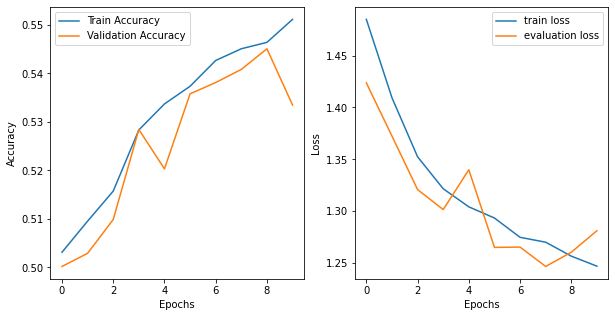

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

#TRANSFER LEARNING

## modelo con ResNet50V2


In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
model2 = ResNet50V2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

In [67]:
model = models.Sequential()
model.add(model2)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))

In [68]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
711/711 [==============================] - 1565s 2s/step - loss: 1.9794 - accuracy: 0.3609 - val_loss: 1.4916 - val_accuracy: 0.5100
Epoch 2/10
711/711 [==============================] - 1552s 2s/step - loss: 1.5274 - accuracy: 0.4974 - val_loss: 1.9588 - val_accuracy: 0.4973
Epoch 3/10
711/711 [==============================] - 1541s 2s/step - loss: 1.4779 - accuracy: 0.5084 - val_loss: 1.4495 - val_accuracy: 0.5093
Epoch 4/10
711/711 [==============================] - 1546s 2s/step - loss: 1.4635 - accuracy: 0.5080 - val_loss: 1.5575 - val_accuracy: 0.5039
Epoch 5/10
711/711 [==============================] - 1554s 2s/step - loss: 1.4563 - accuracy: 0.5087 - val_loss: 1.4566 - val_accuracy: 0.5100
Epoch 6/10
711/711 [==============================] - 1557s 2s/step - loss: 1.4542 - accuracy: 0.5093 - val_loss: 1.5374 - val_accuracy: 0.5112
Epoch 7/10
711/711 [==============================] - 1547s 2s/step - loss: 1.4541 - accuracy: 0.5088 - val_loss: 1.4883 - val_accuracy:

##MODELO CON MOBILENET

In [71]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Cargar el modelo pre-entrenado MobileNet sin la capa superior
base_model = MobileNet(weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [72]:
model2 = base_model.output
model2 = GlobalAveragePooling2D()(model2)
# Añadir una capa densa con función de activación ReLU
model2 = Dense(1024, activation='relu')(model2)

model2 = BatchNormalization()(model2)
model2 = Dropout(0.5)(model2)

model2 = Dense(512, activation='relu')(model2)
model2 = BatchNormalization()(model2)

model2 = Dropout(0.3)(model2)

In [74]:
predictions = Dense(8, activation='softmax')(model2)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# Descongelar las últimas N capas de MobileNet
N = 20
for layer in base_model.layers[-N:]:
    layer.trainable = True

In [75]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
711/711 [==============================] - 187s 257ms/step - loss: 1.5806 - accuracy: 0.4984 - val_loss: 1.3187 - val_accuracy: 0.5216
Epoch 2/10
711/711 [==============================] - 184s 259ms/step - loss: 1.2900 - accuracy: 0.5505 - val_loss: 1.5148 - val_accuracy: 0.5433
Epoch 3/10
711/711 [==============================] - 189s 265ms/step - loss: 1.2212 - accuracy: 0.5691 - val_loss: 1.5839 - val_accuracy: 0.4285
Epoch 4/10
711/711 [==============================] - 193s 271ms/step - loss: 1.2028 - accuracy: 0.5692 - val_loss: 1.3667 - val_accuracy: 0.5429
Epoch 5/10
711/711 [==============================] - 183s 258ms/step - loss: 1.1817 - accuracy: 0.5791 - val_loss: 1.3551 - val_accuracy: 0.5398
Epoch 6/10
711/711 [==============================] - 195s 274ms/step - loss: 1.1644 - accuracy: 0.5854 - val_loss: 2.3391 - val_accuracy: 0.5243
Epoch 7/10
711/711 [==============================] - 182s 256ms/step - loss: 1.1475 - accuracy: 0.5902 - val_loss: 1.4165 -

##conclusiones
- Para este proyecto final trabajamos con 3 modelos, un convolucional y dos modelos preentrenados que se especializan en imagenes

observamos que el modelo convolucional fue el que obtuvo un mejor comportamiento y esto es debido a que es un modelo diseñado para detectar patrones como los contenidos en las imagenes con las que trabajamos.

el modelo resnetv2 puede ser un modelo eficiente pero debido a su tiempo de ejecucion se hace dificil trabajar con el

Con el modelo Mobilenet trabajamos de una forma distinta congelando capas para obtener mejores resultados pero el modelo no funciono como esperabamos